## Объектно ориентированное API


![Title](https://248006.selcdn.ru/public/email/courses/Профессия%20Data%20Scientist/extended_fig_map.jpg)

## Subplots

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

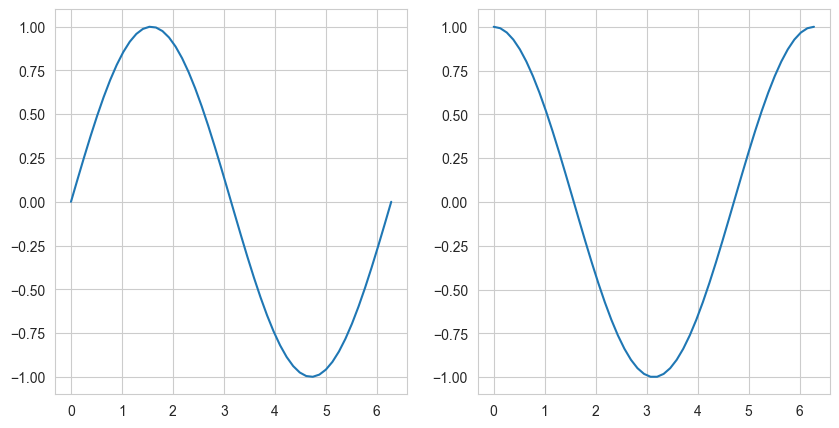

In [2]:
x = np.linspace(0, 2*np.pi, 50)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

In [3]:
data = pd.read_csv('Tesla.csv', parse_dates=True, index_col='Date')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2016-12-23,213.449997,207.710007,208.000000,213.339996,4662900,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005


In [ ]:
from pandas.tseries.offsets import MonthEnd

def get_monthly_dates(data):
    date = data.index[0]
    dates = []
    while date < data.index[-1]:
        date = date + MonthEnd(1)
        dates.append(date)
    return dates

In [ ]:
data.index[0]

In [ ]:
import math

In [ ]:
year = 2010

fig, axes = plt.subplots(2, 2, figsize=(20,20))

for row in range(2):
    for column in range(2):
        year_data = data[data.index.year == year]
        dates = get_monthly_dates(year_data)
        axes[row, column].plot(year_data.index, year_data['High'], label='High', color='g')
        axes[row, column].plot(year_data.index, year_data['Low'], label='Low', color='r')
        axes[row, column].set_title('Stock prices in {}, US$'.format(year))
        axes[row, column].set_xlabel('Dates')
        axes[row, column].set_ylabel('Stock prices, US$')
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y")\
                                           for date in dates], rotation=45)
        yticks = range(math.floor(min(year_data['Low'])), math.ceil(max(year_data['High'])), 5)
        axes[row, column].set_yticks(yticks)
        axes[row, column].set_yticklabels(yticks)

        axes[row, column].grid()
        axes[row, column].legend(loc='upper left', title='Stock prices')

        year += 1

plt.show()

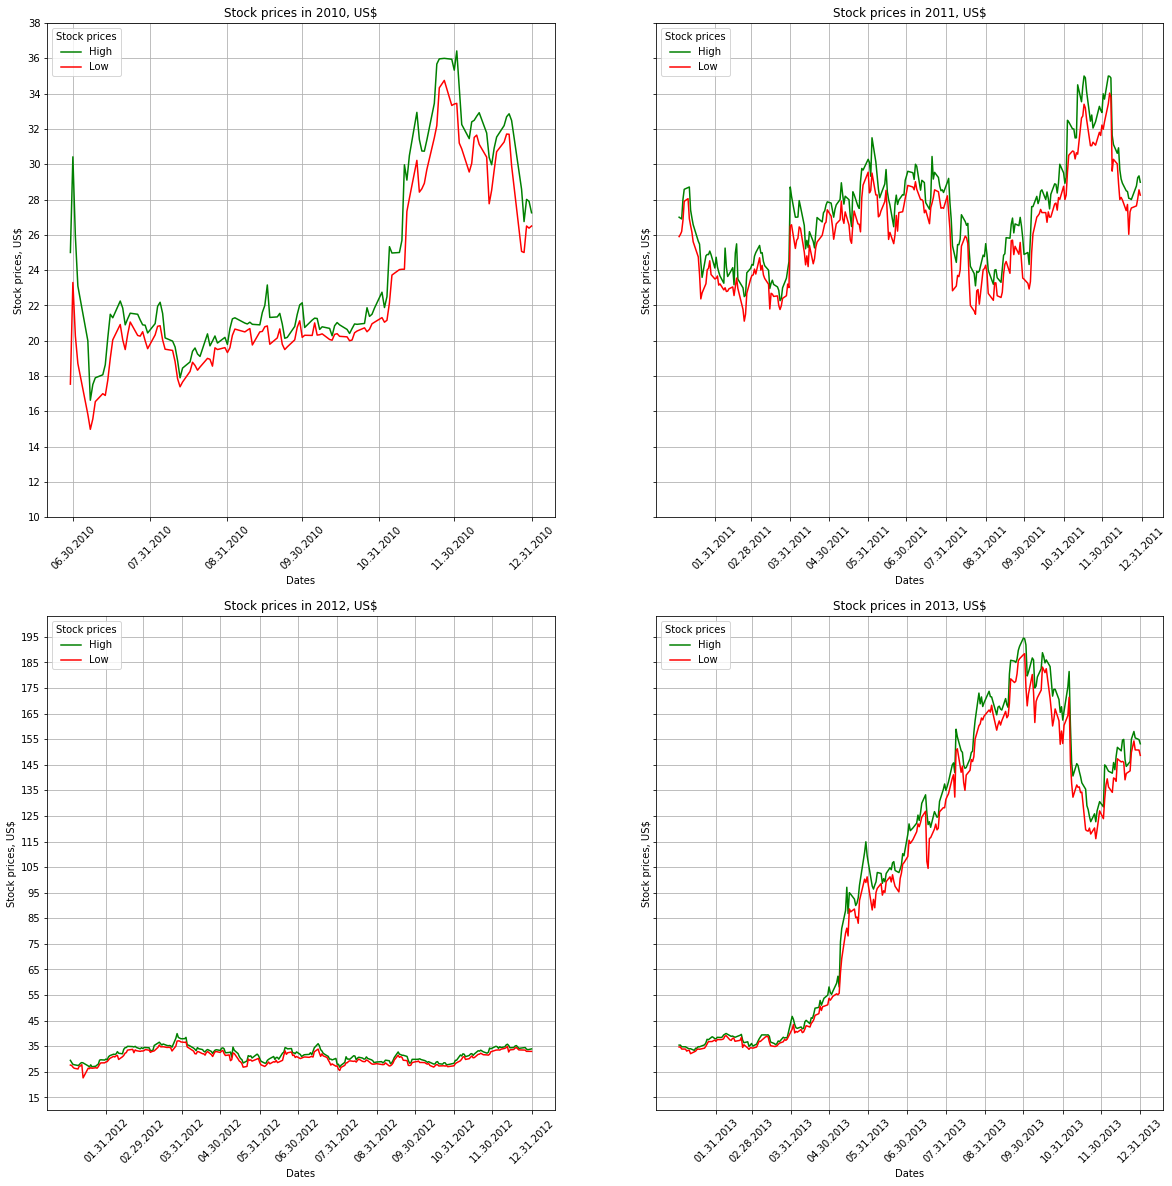

In [ ]:
year = 2010

fig, axes = plt.subplots(2, 2, figsize=(20,20), sharey='row')

for row in range(2):
    for column in range(2):
        year_data = data[data.index.year == year]
        dates = get_monthly_dates(year_data)
        axes[row, column].plot(year_data.index, year_data['High'], label='High', color='g')
        axes[row, column].plot(year_data.index, year_data['Low'], label='Low', color='r')
        axes[row, column].set_title('Stock prices in {}, US$'.format(year))
        axes[row, column].set_xlabel('Dates')
        axes[row, column].set_ylabel('Stock prices, US$')
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y")\
                                           for date in dates], rotation=45)
        axes[row, column].grid()
        axes[row, column].legend(loc='upper left', title='Stock prices')

        year += 1

plt.setp(axes[0:], yticks=range(10, 40, 2), yticklabels=range(10, 40, 2))
plt.setp(axes[1:], yticks=range(15, 200, 10), yticklabels=range(15, 200, 10))
plt.show()

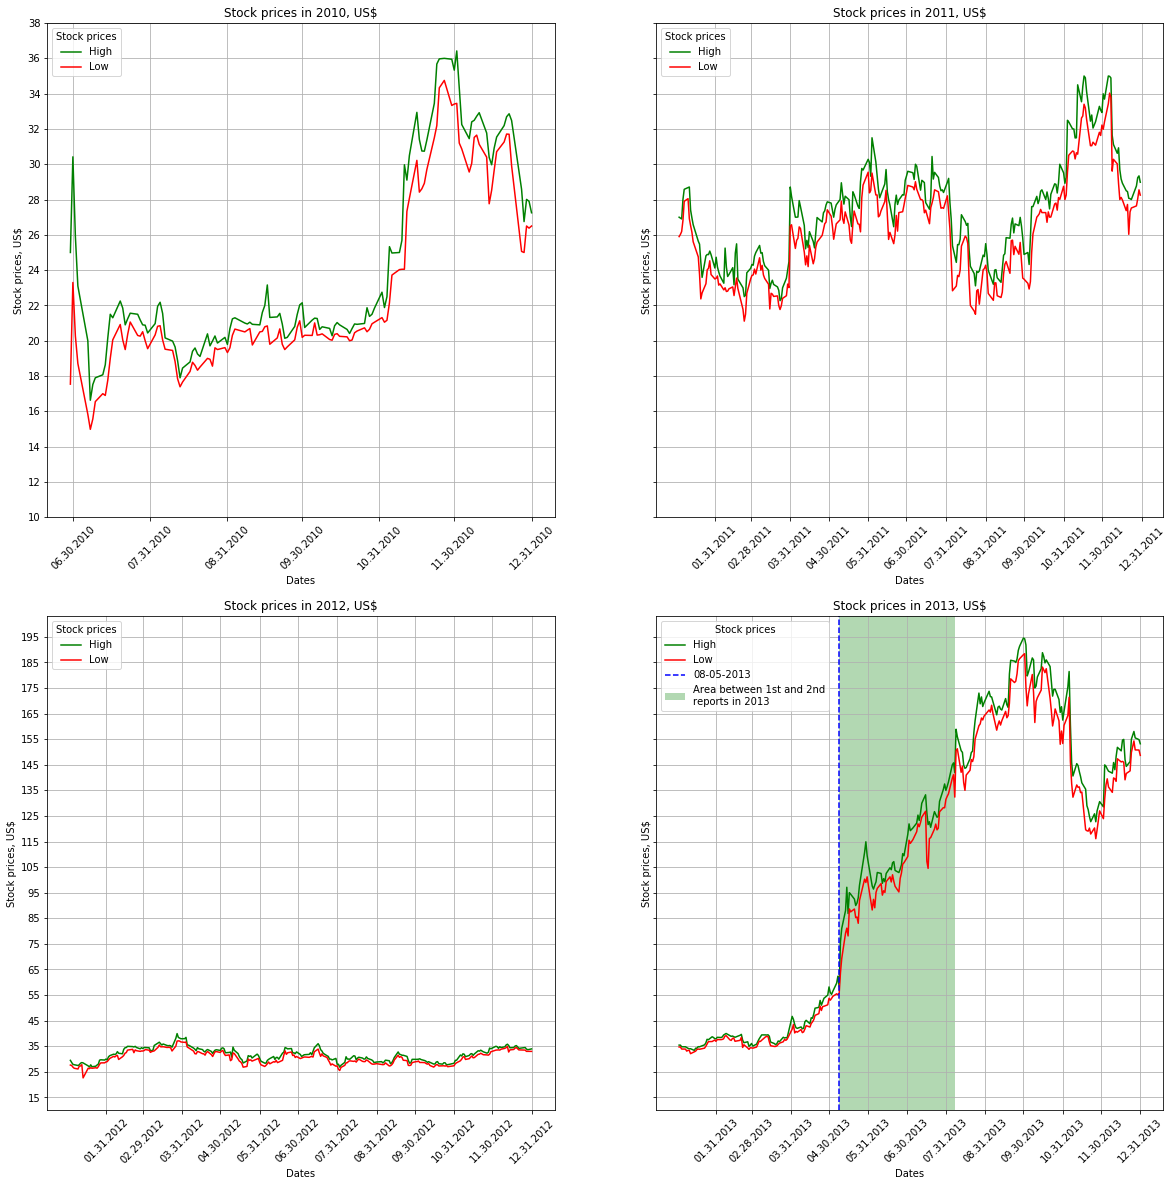

In [ ]:
year = 2010
first_profit_report_date = pd.Timestamp(day=8, month=5, year=2013)
second_after_profit_report_date = pd.Timestamp(day=7, month=8, year=2013)

fig, axes = plt.subplots(2, 2, figsize=(20,20), sharey='row')

for row in range(2):
    for column in range(2):
        year_data = data[data.index.year == year]
        dates = get_monthly_dates(year_data)
        axes[row, column].plot(year_data.index, year_data['High'], label='High', color='g')
        axes[row, column].plot(year_data.index, year_data['Low'], label='Low', color='r')
        axes[row, column].set_title('Stock prices in {}, US$'.format(year))
        axes[row, column].grid()
        axes[row, column].set_xticks(dates)
        axes[row, column].set_xticklabels([pd.to_datetime(str(date)).strftime("%m.%d.%Y")\
                                           for date in dates], rotation=45)
        year += 1

        axes[row, column].legend(loc='upper left', title='Stock prices')

plt.setp(axes[0:], yticks=range(10, 40, 2), yticklabels=range(10, 40, 2))
plt.setp(axes[1:], yticks=range(15, 200, 10), yticklabels=range(15, 200, 10))
plt.setp(axes, xlabel='Dates', ylabel='Stock prices, US$')

axes[1, 1].axvline(first_profit_report_date, ls='--', color='b', label=first_profit_report_date.strftime("%d-%m-%Y"))
axes[1, 1].axvspan(first_profit_report_date, second_after_profit_report_date, facecolor='g', alpha=0.3,
                   label='Area between 1st and 2nd\nreports in 2013')
plt.legend(loc='upper left', title='Stock prices')

plt.show()

## Дополнительные материалы
[Сборник с базовыми примерами по отрисовке основных графиков](https://matplotlib.org/3.1.1/tutorials/introductory/sample_plots.html)

[Функции модуля pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

[Галерея примеров более сложных графиков](https://matplotlib.org/3.2.1/gallery/index.html)

[Обзор разных инструментов matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)

## Домашнее задание
- Постройте с помощью subplots графики цены для датасета aws spot prices для ОС Windows и всех архитектур вида i*.

*Обратите внимание на то, какой лучше сделать период между датами для удобного отображения.

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('ap-northeast-1.csv', parse_dates=True)
data.columns = ['Date', 'Architecture', 'OS', 'Articul', 'Price']
data = data[data['Architecture'].str.contains("^i", na=False, regex=True)]

arch_column = data['Architecture'].unique()

# arch_group_list = list(data.groupby('Architecture'))
# d = pd.DataFrame(arch_group_list)
# arch_group_size = data.groupby('Architecture').size()
pd.date_range(data['Date'].min(), data['Date'].max()).strftime('%d.%m.%Y').tolist()

['30.03.2017',
 '31.03.2017',
 '01.04.2017',
 '02.04.2017',
 '03.04.2017',
 '04.04.2017',
 '05.04.2017',
 '06.04.2017',
 '07.04.2017',
 '08.04.2017',
 '09.04.2017',
 '10.04.2017',
 '11.04.2017',
 '12.04.2017',
 '13.04.2017',
 '14.04.2017',
 '15.04.2017',
 '16.04.2017',
 '17.04.2017',
 '18.04.2017',
 '19.04.2017',
 '20.04.2017',
 '21.04.2017',
 '22.04.2017',
 '23.04.2017',
 '24.04.2017',
 '25.04.2017',
 '26.04.2017',
 '27.04.2017',
 '28.04.2017',
 '29.04.2017',
 '30.04.2017',
 '01.05.2017',
 '02.05.2017',
 '03.05.2017',
 '04.05.2017',
 '05.05.2017',
 '06.05.2017',
 '07.05.2017',
 '08.05.2017']

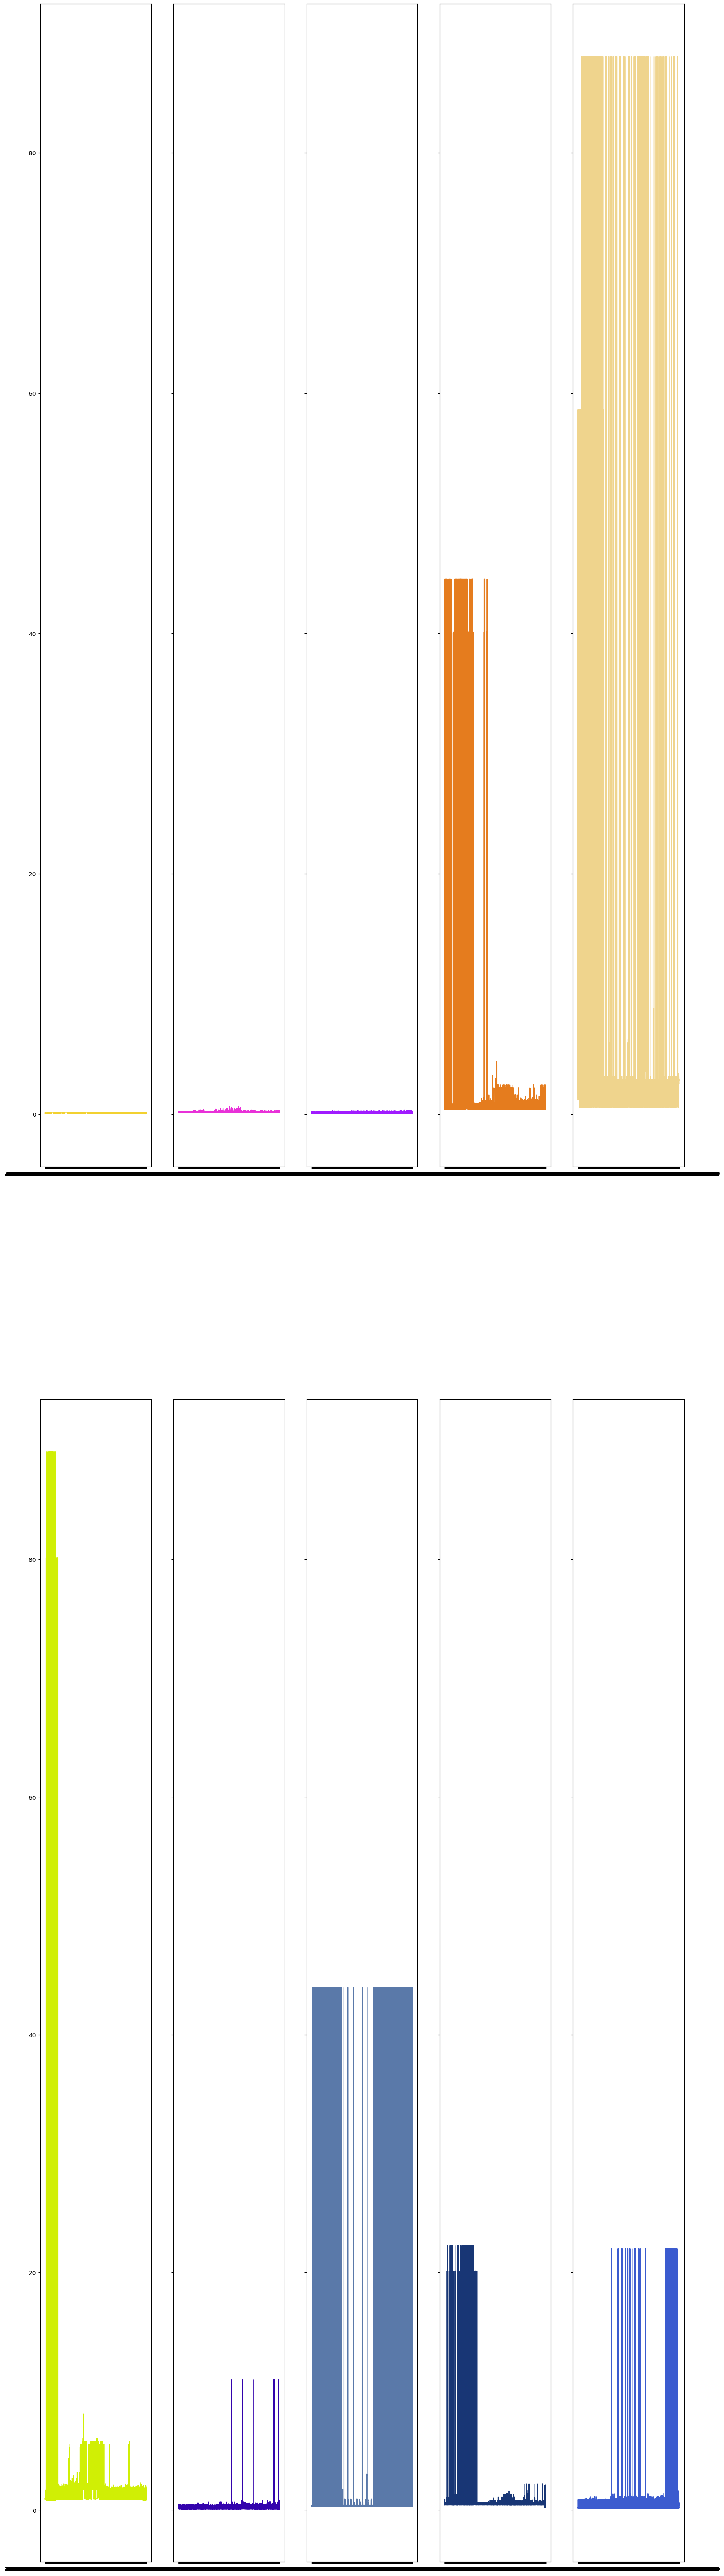

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(20,80), sharey='row')
i = 0
dates = pd.date_range(data['Date'].min(), data['Date'].max()).strftime('%d%m%Y').tolist()
for row in range(2):
    for column in range(5):
        i_data = data[data['Architecture'] == arch_column[i]]
        axes[row, column].plot(i_data['Date'], i_data['Price'], label='price ' + arch_column[i], color=np.random.rand(3,))
        # axes[row, column].set_title('Stock prices in {}, US$'.format(arch_column[i]))
        # axes[row, column].grid()
        # axes[row, column].set_xticks(dates)
        # axes[row, column].set_xticklabels(dates, rotation=45)
        # axes[row, column].legend(loc='upper left', title='Stock prices')
        i += 1


# plt.setp(axes[0:], yticks=range(10, 40, 2), yticklabels=range(10, 40, 2))
# plt.setp(axes[1:], yticks=range(15, 200, 10), yticklabels=range(15, 200, 10))
# plt.setp(axes, xlabel='Dates', ylabel='Stock prices, US$')
# 
# 
# plt.legend(loc='upper left', title='Stock prices')

plt.show()